In [1]:
#https://www.kaggle.com/banksn
#https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV




#run random grid again
#Gradient boosted XGBOOST

In [2]:
def find_accuracy(list1, list2):
    difference_count = 0
    
    if list1.size!=list2.size:
        print('error, lists not the same size')
    else:
        for x in range(list1.size):
            difference_count += abs(int(list1[x]) - int(list2[x]))
            #print(list1[x],list2[x])
            
    print(f'In {list1.size} elements, you had a difference of {difference_count}')
    print(f'This means an average of {difference_count/list1.size} deviation per hold')

In [3]:
train_data = pd.read_csv("data11.csv")
train_data.tail()

,Unnamed: 0,Hold 0,Hold 1,Hold 2,Hold 3,Hold 4,Hold 5,Hold 6,Hold 7,Hold 8,...,Quadrant 10,Quadrant 4,Quadrant 13,Quadrant 0,Quadrant 11,Quadrant 12,Quadrant 2,total_Sloper,Quadrant 14,Hold 310
850,850,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
851,851,0,0,4,0,0,0,0,0,0,...,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
852,852,0,0,0,4,0,0,0,0,0,...,0.0,0.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
853,853,0,0,0,0,0,0,0,0,4,...,2.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0
854,854,0,0,0,0,0,0,0,0,0,...,3.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0


In [4]:
train_data = train_data.loc[:, train_data.columns != "Unnamed: 0"]
train_data = train_data.loc[:, train_data.columns != "name"]
train_data = train_data.loc[:, train_data.columns != "filepath"]

In [5]:
y = train_data["grade"]

In [6]:
train_data = train_data.loc[:, train_data.columns != "grade"]

In [7]:
X = train_data

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# parameters = {
#     'n_estimators': [500,400,300,200,100] ,
#     'min_samples_split': [0.01, 0.005, 0.001], 
#     'min_samples_leaf': [0.01, 0.005, 0.001], 
#     'max_features': ['sqrt',0.1, 0.25, 0.5,0.75], 
#     'max_depth': [5,4,3,2,1], 
#     'bootstrap': [True,False]}

# Random Search V1
# parameters = {
#  'bootstrap': [True, False],
#  'max_depth': [15,10,5,4,3,2,1,None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [500,400,300,200,100]}

# # Random Search
# parameters = {'n_estimators': [500],
#  'min_samples_split': [2],
#  'min_samples_leaf': [2],
#  'max_features': ['auto'],
#  'max_depth': [15],
#  'bootstrap': [True]}

# Grid Search
parameters = {'bootstrap': [True],
 'max_depth': [25],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [3],
 'n_estimators': [400]}

# Random Tuning
# parameters = {'n_estimators': [50],
#  'min_samples_split': [2],
#  'min_samples_leaf': [4],
#  'max_features': ['auto'],
#  'max_depth': [10],


# parameters = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Grid Search after finding good randomssearch parameters
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


In [9]:
# # Create the parameter grid based on the results of random search 
# param_grid = {'n_estimators': [400,450,500,550,1000],
#  'min_samples_split': [1,2,3],
#  'min_samples_leaf': [1,2,3],
#  'max_features': ['auto'],
#  'max_depth': [5,10,15,20,25,100],
#  'bootstrap': [True]
# }




# # Create a based model
# model = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_squared_error',
#                           cv = 3, n_jobs = -1, verbose = 2)
# RandomizedSearch = grid_search

In [10]:
model = RandomForestRegressor()

RandomizedSearch = RandomizedSearchCV(estimator=model,
             param_distributions=parameters, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, verbose=2, random_state=42, n_iter = 1)

In [11]:

# model.fit(X_train, y_train)

RandomizedSearch.fit(X_train, pd.to_numeric(y_train))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True], 'max_depth': [25],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [3],
                                        'n_estimators': [400]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [12]:
RandomizedSearch.best_params_

{'n_estimators': 400,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25,
 'bootstrap': True}

In [13]:
np.round(RandomizedSearch.predict(X_train))

array([4., 2., 7., 4., 1., 4., 6., 8., 6., 6., 6., 3., 7., 1., 2., 7., 7.,
       5., 4., 4., 7., 4., 7., 4., 3., 5., 3., 3., 6., 4., 4., 6., 7., 0.,
       4., 7., 5., 8., 8., 7., 6., 6., 5., 4., 3., 5., 7., 8., 0., 1., 6.,
       7., 0., 5., 7., 4., 4., 5., 3., 3., 2., 4., 7., 6., 2., 6., 1., 6.,
       5., 5., 5., 0., 6., 4., 5., 4., 6., 7., 1., 3., 5., 6., 3., 6., 3.,
       7., 4., 3., 2., 7., 1., 5., 4., 0., 3., 5., 7., 6., 2., 4., 3., 6.,
       6., 5., 5., 2., 4., 3., 2., 6., 8., 5., 5., 3., 6., 6., 6., 5., 6.,
       5., 5., 5., 3., 6., 2., 9., 2., 4., 5., 1., 7., 7., 8., 2., 4., 5.,
       6., 3., 3., 5., 8., 3., 6., 7., 5., 7., 7., 7., 3., 5., 2., 4., 4.,
       7., 3., 3., 2., 5., 3., 5., 7., 2., 6., 3., 5., 5., 6., 4., 3., 3.,
       4., 3., 3., 3., 6., 7., 5., 5., 6., 5., 6., 7., 7., 3., 2., 4., 3.,
       6., 4., 3., 1., 4., 3., 4., 8., 4., 6., 4., 5., 5., 6., 4., 4., 5.,
       4., 6., 1., 4., 4., 5., 8., 4., 6., 7., 5., 3., 3., 3., 3., 4., 3.,
       2., 5., 8., 8., 6.

In [14]:
val_predict = RandomizedSearch.predict(X_validation)
val_grade = np.round(val_predict)

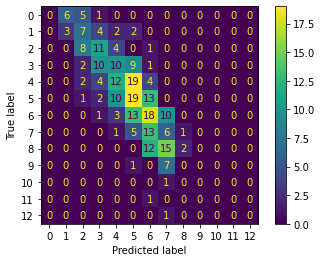

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
label_range = np.arange(0, 13, 1)
cm = confusion_matrix(y_validation, val_grade, labels=label_range)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_range)
disp.plot()

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train.values, RandomizedSearch.predict(X_train))

0.35680977906876044

In [17]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_train.values, RandomizedSearch.predict(X_train))

0.9283628231666123

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_validation.values, RandomizedSearch.predict(X_validation))

1.9368227463335088

In [19]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_validation.values, RandomizedSearch.predict(X_validation))

0.6577634361990001

In [20]:
find_accuracy(y_train.values, RandomizedSearch.predict(X_train))

In 572 elements, you had a difference of 335
This means an average of 0.5856643356643356 deviation per hold


In [21]:
find_accuracy(y_validation.values, RandomizedSearch.predict(X_validation))

In 283 elements, you had a difference of 317
This means an average of 1.1201413427561837 deviation per hold


In [22]:
# y.plot.hist()

In [23]:
#plot_confusion_matrix(model, X_validation, y_validation)

In [24]:
#print(classification_report(y_train, model.predict(X_train)))

In [25]:
#print(classification_report(y_validation, model.predict(X_validation)))

In [26]:

# print(roc_auc_score(y_train, model.predict(X_train), average=None))
# print(roc_auc_score(y_validation, model.predict(X_validation), average=None))
